<p style="text-align:left;">
    Lefort Tanguy
    <span style="float:right;">
        2019-2020
    </span>
</p>
<center>  M1 - Biostatistics - HMMA238 Développement Logiciel </center><br>

<center style="font-size:300%;"> <strong style="color:blue;"> Conway's game of life </strong> </center><br>

*****  

<h1>Table of contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Implementation-without-numpy-" data-toc-modified-id="Implementation-without-numpy--1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Implementation without numpy <a name="without"></a></a></span></li><li><span><a href="#Implementation-with-numpy" data-toc-modified-id="Implementation-with-numpy-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Implementation with numpy</a></span><ul class="toc-item"><li><span><a href="#Simple-model" data-toc-modified-id="Simple-model-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Simple model</a></span></li><li><span><a href="#Random-model" data-toc-modified-id="Random-model-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Random model</a></span></li><li><span><a href="#Specific-configurations" data-toc-modified-id="Specific-configurations-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Specific configurations</a></span></li></ul></li><li><span><a href="#Implementation-using-classes-and-numpy" data-toc-modified-id="Implementation-using-classes-and-numpy-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Implementation using classes and numpy</a></span></li><li><span><a href="#Bonus-:-tore-like-model" data-toc-modified-id="Bonus-:-tore-like-model-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Bonus : tore-like model</a></span></li></ul></div>

In [1]:
import numpy as np
import utils 
import matplotlib.pyplot as plt
from matplotlib import animation

%matplotlib notebook

In order to compute this game, one must know the rules. Let $n$ be the number of living cells in the $8$ neighborhood of a cell.
<div class="alert alert-block alert-info">
<ol type="1">
  <li>If $n=0$ or $n=1$ and the cell is alive: it dies of isolation,</li>
  <li>if $n=2$ or $n=3$ and the cell is alive: it stays alive,</li>
  <li>if $n=3$ and the cell is dead: it's born,</li>
   <li>if $n\geq 3$ and the cell is alive: it dies.</li>
</ol>
</div>

With the code underneath we were able to provide an example of these rules right below.

<IPython.core.display.Javascript object>


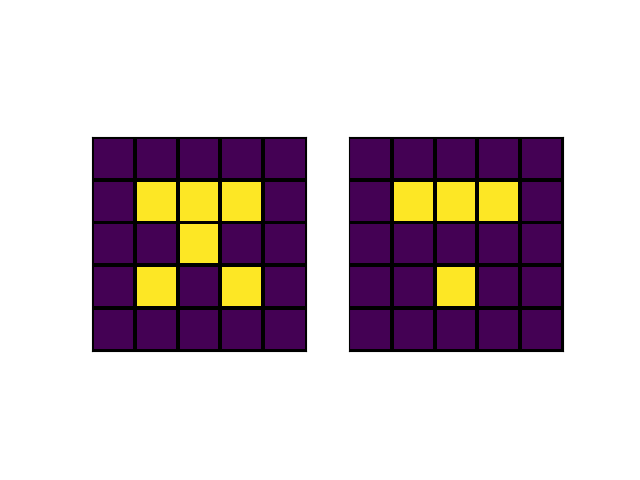

In [2]:
utils.display_pic('./pictures/before-after.png',
                  "Initial grid (left) and it's next iteration showing the four rules (right).")

# Implementation without numpy <a name="without"></a>

In [3]:
filename = "HMMA238_TP_tanguylefort.ipynb"
taille_str = len(filename)
ma_graine = taille_str % 6
print("My seed is {}.".format(ma_graine))

My seed is 5.


In order to implement the rules, we need to function right underneath which will allow us to get the number of living cells in the 8-neighborhood of another. This creates a list used in every step of the game.

In [4]:
def calcul_nb_voisins(Z):
    """Compute the number of neighbors.

    Keyword arguments:
        Z -- a 2D binary list of lists

    Returns:
        N -- a 2D list of lists the size of Z where each element is the sum of
        the values in the 8-neighborhood (the number of neighbors if Z is binary)
    """
    forme = len(Z), len(Z[0])
    N = [[0, ] * (forme[0]) for i in range(forme[1])]
    for x in range(1, forme[0] - 1):
        for y in range(1, forme[1] - 1):
            N[x][y] = Z[x-1][y-1]+Z[x][y-1]+Z[x+1][y-1] \
                + Z[x-1][y] + Z[x+1][y] \
                + Z[x-1][y+1]+Z[x][y+1]+Z[x+1][y+1]
    return N

In [5]:
Z = [[0, 0, 0, 0, 0, 0],
     [0, 0, 0, 1, 0, 0],
     [0, 1, 0, 1, 0, 0],
     [0, 0, 1, 1, 0, 0],
     [0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0]]

N = calcul_nb_voisins(Z)
print(N)

[[0, 0, 0, 0, 0, 0], [0, 1, 3, 1, 2, 0], [0, 1, 5, 3, 3, 0], [0, 2, 3, 2, 2, 0], [0, 1, 2, 2, 1, 0], [0, 0, 0, 0, 0, 0]]


In [6]:
def iteration_jeu(Z):
    """Realize an iteration of Conway's game.

    As the rules state, one cell in the grid dies if it's surrounded by 4 or more living cells or stricly less than 2.
    A new cell is born if it's currently dead and there is exactly two living cells in the 8-neighborhood.
    Nothing happens in the other situations. We assume that the border is made of dead cells.

    Keyword arguments:
        Z -- a 2D list of lists representing the initial set of cells

    Returns:
        Z -- a 2D list of lists representing the state of the cells after one iteration of the game

    Example:
        >>> init_grid = [[0,0,0,0],[0,0,1,0],[0,1,1,0],[0,0,0,0]]
        >>> iteration_jeu(init_grid)
        [[0, 0, 0, 0], [0, 1, 1, 0], [0, 1, 1, 0], [0, 0, 0, 0]]
    """
    forme = len(Z), len(Z[0])
    N = calcul_nb_voisins(Z)
    for x in range(1, forme[0]-1):
        for y in range(1, forme[1]-1):
            if Z[x][y] == 1 and (N[x][y] < 2 or N[x][y] > 3):
                Z[x][y] = 0
            elif Z[x][y] == 0 and N[x][y] == 3:
                Z[x][y] = 1
    return Z

<IPython.core.display.Javascript object>


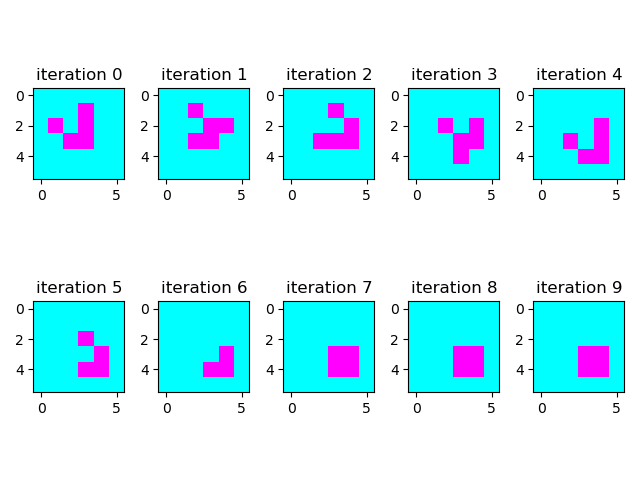

In [7]:
iterations = [0]*10
iterations[0] = Z
for i in range(1, 10):
    iterations[i] = iteration_jeu(np.copy(iterations[i-1]))

utils.display_sub(iterations, "First 10 iterations \
                  of Conway's game of life for our grid", 2, 5)

As we can see, the shape we've created (the glider) goes from the top left to the bottom right of our grid in the first $4$ iterations. After the $7^{th}$, we see that all iterations are and will be the same going as far as we want because of the $2\times 2$ square structure. Indeed, each living cell has exactly $3$ neighbors in a corner thus can't die or produce any descendant. With an "infinite" grid like a tore, there wouldn't have been this stabilization. We would have seen the $4$-step periodicity of the shape traveling at a speed of $1$-cell-each-$4$-iterations.

#  Implementation with numpy

## Simple model

In [8]:
vect = np.array([0,1,0,0,1,1])
nb_vect = np.zeros(vect.shape)
nb_vect[1:-1] += (vect[:-2] + vect[2:])
nb_vect

array([0., 0., 1., 1., 1., 0.])

`nb_vect` is here the number of neighbors in the $2$-neighborhood of a binary grid considering its borders are dead.

In [9]:
def calcul_nb_voisins_np(Z):
    """Faster function to compute the number of neighbors using slicing.

    Keyword arguments:
    Z -- a 2D binary numpy array (or a coercible object to get one) 

    Returns:
    neig -- a numpy array the same shape as Z
    or a string explaining the array is not made of 0 and 1.
    """
    if not np.array_equal(np.unique(Z), np.array([0, 1])):
        return("Not a binary array : can't compute the number of neighbors.")
    neig = np.zeros_like(Z)
    go_through = Z[0:-2, 0:-2] + \
        Z[:-2, 2:] + \
        Z[2:, :-2] + \
        Z[:-2, 1:-1] + \
        Z[1:-1, 2:] + \
        Z[1:-1, :-2] + \
        Z[2:, 1:-1] + \
        Z[2:, 2:]
    # put the sums in the center and leave the borders dead
    neig[1:-1, 1:-1] = go_through
    return(neig)

Let's try this function on the array $Z$ and compare it to what we previously had. Let's note that we took more precautions with this function because we will use it more often as it is faster .

In [10]:
Z = [[0, 0, 0, 0, 0, 0],
     [0, 0, 0, 1, 0, 0],
     [0, 1, 0, 1, 0, 0],
     [0, 0, 1, 1, 0, 0],
     [0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0]]
np.array_equal(calcul_nb_voisins_np(np.array(Z)), N)

True

In [11]:
def iteration_jeu_np(Z):
    """Realize an iteration of Conway's game.

    As the rules state, one cell in the grid dies if it's surrounded by 4 or more living cells or stricly less than 2.
    A new cell is born if it's currently dead and there is exactly two living cells in the 8-neighborhood.
    Nothing happens in the other situations. We assume that the border is made of dead cells.

    Keyword arguments:
        Z -- a 2D binary numpy array

    Returns:
        Z -- a 2D binary numpy array representing the state of the cells after one iteration of the game

    Example:
        >>> init_grid = np.array([[0,0,0,0],[0,0,1,0],[0,1,1,0],[0,0,0,0]])
        >>> iteration_jeu_np(init_grid)
        [[0, 0, 0, 0]
         [0, 1, 1, 0]
         [0, 1, 1, 0]
         [0, 0, 0, 0]]
    """
    if not isinstance(Z, np.ndarray):
        Z = np.array(Z)
    old_Z = Z.copy()
    nrow, ncol = Z.shape
    N = calcul_nb_voisins_np(Z)
    for x in range(1, nrow-1):
        for y in range(1, ncol-1):
            if Z[x][y] == 1 and (N[x][y] < 2 or N[x][y] > 3):
                Z[x][y] = 0
            elif Z[x][y] == 0 and N[x][y] == 3:
                Z[x][y] = 1
    return Z

<IPython.core.display.Javascript object>


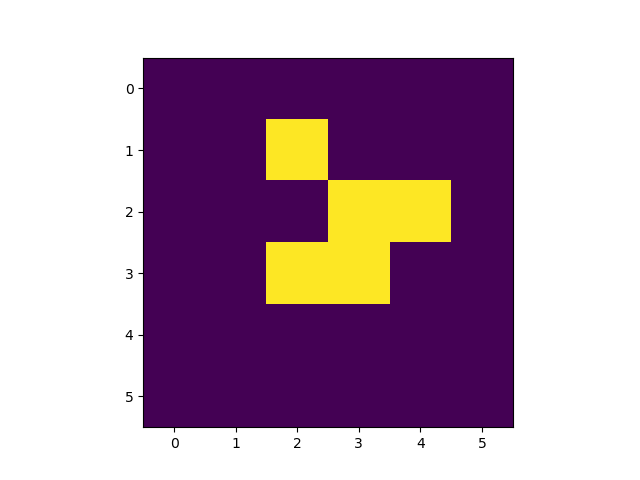

In [12]:
utils.display_one_plot(iteration_jeu_np(Z),'One iteration of the game with numpy.')

Now that we have the means to compute one iteration, the next step is the get the state of our array after any number of iterations. To do so, we will use the recursivity.

In [13]:
def jeu_np(Z_in,nb_iter):
    """Returns the state of the grid after nb_iter iterations of the grid.
    
    Keyword arguments:
    Z_in -- 2D binary numpy array for the initial state of the grid
    nb_iter -- a positive integer representing after how many steps we wish to see the game
    """
    if nb_iter == 0:
        return(Z_in)
    else:
        return(jeu_np(iteration_jeu_np(Z_in),nb_iter-1))

Now that we've got everything to compute the iterations of the game, a way to visualize what happens with an animation on a bigger grid.

<IPython.core.display.Javascript object>


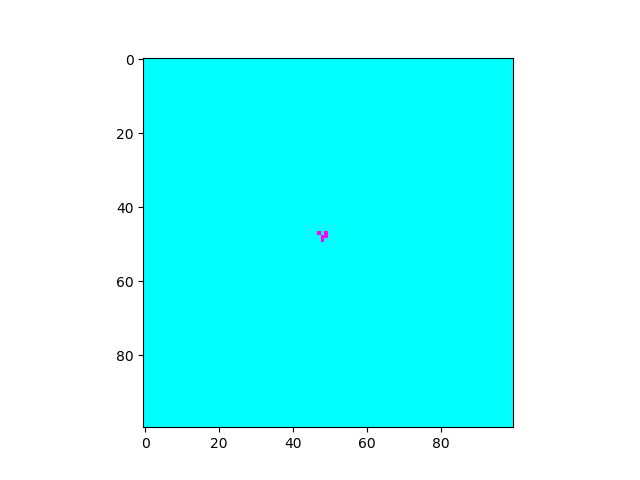

In [14]:
import utils

Z_huge = np.zeros((100, 100))
Z_np = np.array(
[[0, 0, 0, 0, 0, 0],
[0, 0, 0, 1, 0, 0],
[0, 1, 0, 1, 0, 0],
[0, 0, 1, 1, 0, 0],
[0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0]])
Z_huge[10:16, 10:16] = Z_np


utils.anim_game(Z_huge,iteration_jeu_np,200,"Glider on a 100 x 100 grid")


## Random model 

In [15]:
proba = (1 + ma_graine) * 10 / 100
random_mat = np.random.binomial(size=100*100, n=1, p=proba).reshape(100, 100)

## Specific configurations

# Implementation using classes and numpy

# Bonus : tore-like model